В общем случае природа переноса тепла включает в себя механизмы конвекции, излучения, испарения и теплопроводности. 

Когда разность температур окрудающей среды и объекта не сильно велика, скорость изменения температуры объекта можно считать пропорциональной этой разности температур:

$\frac{dT}{dt} = -r(T - T_s)$  - закон теплопроводности Ньютона



$Т$ - температура тела  
$T_s$ - температура окружающей среды  
$r$ - коэффициент остывания  



Дифферецниальное уравнение первого порядка

$\frac{dy}{dt} = g(x)$

В общем случае аналитического решения дифферецниального уравнения, выраженного через хорошо известные функции не существует.

# Алгоритм Эйлера

Преобразуем дифферециальное уравнение в конечно-разностное

$y_1 = y(x_0) + \Delta y \approx y(x_0) + g(x_0)\Delta x$

$y_2 \approx y(x_1) + g(x_1)\Delta x$

$x_n = x0 + n\Delta x$

$y_n \approx y_{n-1} + g(x_{n-1})\Delta x$


1. найти параметр r лучше всего описывающий данные
2. Начальная температура кофе 90 градусов. Наслаждаться кофе можно, когда температура опуститься ниже 75 градусов.
Допустим, что при 90 градусах добавление молока понижает температуру кофе на 5 градусов. Если вы торопитесь и 
хотите охладить кофе как можно быстрее, будете ли вы добавлять сначала молоко и ждать, пока кофе остынет, или же 
подождете до тех пор, пока кофе остынет до 80 градусов, а затем добавите молоко?
3. найдите время, неоходимое для того, чтобы разность температур между температурой кофе и комнатной температурой составила $1/e \approx 0.37$ от начальной. Это время называется временем релаксации или временем остывания. Зависит ли  время релаксации от начальной температуры кофе или комнатной температуры? Попробуйте взять различные значения коэффициента r и определите качественноую зависимость времени релаксации от r.

In [41]:
10**-2

0.01

In [52]:
def euleri(f, dx, xn, yn):  # метод Эйлера
    return yn + f(xn) * dx

def pparabol(x):  # производная параболы
    return 3*x**2  

def f_true(x):
    return x**3


xs_end = []
ys_end = []
fs_end = []
ts_end = []
error_end = []
dx_end = []

for j in range(1, 6):
    x = 1
    y = 1
    dx = 10**(-j)
    print(dx)
    xs = []
    ys = []
    fs = []
    ts = []
    error = []

    for i in range(100*10**j+1):
        xs.append(x)
        ys.append(y)
        fs.append(pparabol(x))
        ts.append(f_true(x))
        error.append(abs(f_true(x) - y))

        y = euleri(pparabol, dx, x, y)
        x = x + dx
        
    dx_end.append(dx)
    xs_end.append(xs[-1])
    ys_end.append(ys[-1])
    fs_end.append(fs[-1])
    ts_end.append(ts[-1])
    error_end.append(error[-1])

0.1
0.01
0.001
0.0001
1e-05


In [53]:
dx_end

[0.1, 0.01, 0.001, 0.0001, 1e-05]

In [54]:
import pandas as pd

In [31]:
data = pd.DataFrame({
    "x": xs,
    "y_predict": ys,
    "y'": fs,
    "y_true": ts,
    "error": error,
})

In [32]:
data

,x,y_predict,y',y_true,error
0,1.0,1.000,3.00,1.000,0.000
1,1.1,1.300,3.63,1.331,0.031
2,1.2,1.663,4.32,1.728,0.065
3,1.3,2.095,5.07,2.197,0.102
4,1.4,2.602,5.88,2.744,0.142
...,...,...,...,...,...
996,100.6,1016590.810,30361.08,1018108.216,1517.406
997,100.7,1019626.918,30421.47,1021147.343,1520.425
998,100.8,1022669.065,30481.92,1024192.512,1523.447
999,100.9,1025717.257,30542.43,1027243.729,1526.472


<AxesSubplot: xlabel='x'>

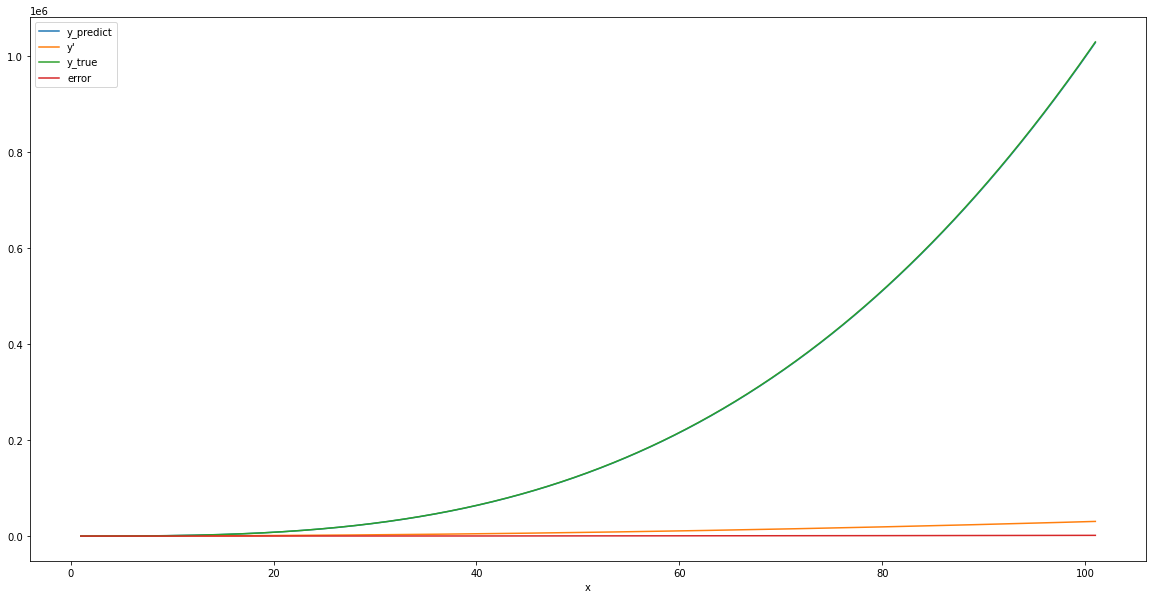

In [33]:
data.plot(x="x", figsize=(20,10))

In [55]:
data_end = pd.DataFrame({
    "x": xs_end,
    "y_predict": ys_end,
    "y'": fs_end,
    "y_true": ts_end,
    "error": error_end,
    "dx": dx_end,
})

In [56]:
data_end

,x,y_predict,y',y_true,error,dx
0,101.0,1.028771e+06,30603.000000,1.030301e+06,1529.500000,0.10000
1,101.0,1.030148e+06,30603.000000,1.030301e+06,152.995000,0.01000
2,101.0,1.030286e+06,30603.000000,1.030301e+06,15.299953,0.00100
3,101.0,1.030299e+06,30603.000001,1.030301e+06,1.530033,0.00010
4,101.0,1.030301e+06,30603.000013,1.030301e+06,0.153315,0.00001


<AxesSubplot: xlabel='dx', ylabel='error'>

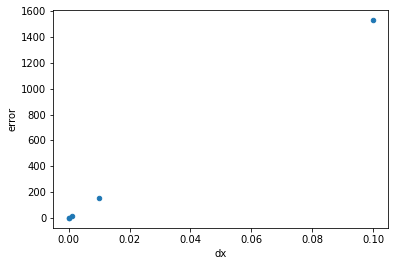

In [57]:
data_end[["error", "dx"]].plot.scatter(x="dx", y="error")

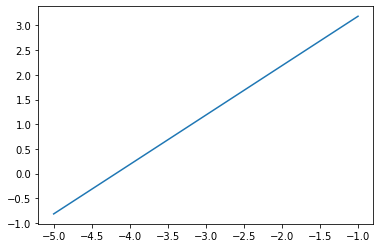

In [59]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.plot(np.log10(data_end.dx), np.log10(data_end.error))

In [67]:
y_pred = np.array([1,2,3])
y_true = np.array([1.2, 3, 2])

np.mean(np.abs(y_true - y_pred))

0.7333333333333334